# Projet de Machine Learning

Observations et exploration des données :
- Les données contiennent des valeurs NaN.
- Des valeurs sont manquantes (ex: l'id 1 n'existe pas) --> Ces valeurs se trouvent dans DataNew_X.csv !
- Les fichiers Data_X.csv et DataNew_X.csv contiennent bien les mêmes arguments (colonnes).

## Importation des librairies

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import *
from sklearn.model_selection import KFold, train_test_split

X = pd.read_csv('Data/Data_X.csv')  # Données
y = pd.read_csv('Data/Data_Y.csv')  # Classes

# Regrouper X et Y
data = pd.concat([X, y], axis=1)
print(data)

# print(X.info())
# print(X.describe())


# Nettoyer les données
## Supprimer les données nulles
## Supprimer les données aberrantes

# kf = KFold(n_splits=5)  # On split en 5 groupes (pour l'instant)
# for train, test in kf.split(X):
#     pass
#
# df = pd.DataFrame(X)
# print(df)

        ID  DAY_ID COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE   
0     1054     206      FR        0.210099       -0.427458       -0.606523  \
1     2049     501      FR       -0.022399       -1.003452       -0.022063   
2     1924     687      FR        1.395035        1.978665        1.021305   
3      297     720      DE       -0.983324       -0.849198       -0.839586   
4     1101     818      FR        0.143807       -0.617038       -0.924990   
...    ...     ...     ...             ...             ...             ...   
1489   459     809      DE        1.529204        1.106682       -1.855327   
1490  1674     887      FR        1.618582        1.752840        0.611392   
1491   748    1083      DE        0.856399        0.489199       -0.255778   
1492  1454    1133      FR        0.560689       -0.343777       -0.830239   
1493   359    1118      DE        0.226730       -0.711005        0.873016   

      FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPO

# Choix du modèle

-> On dispose de valeurs continues.
-> On ne souhaite pas donner une classe prédéfinie, mais prédire une valeur continue.
On va prendre un *algorithme de régression*.

Le sujet nous impose de modéliser les modèles suivants :
1. Régression linéaire simple
2. Régression linéaire régularisée (régression RIDGE + régression LASSO)
3. Méthode des k plus proches voisins pour la régression (K-NN regressor)
4. Arbres de décision pour la régression
5. (Bonus) Forêts aléatoires


# Nettoyage des données

Premièrement, il faut explorer les données avec data.info(), data.describe() et data.isnull().
On remarque que certaines cellules ont pour valeur NaN. On peut choisir :
- de supprimer les lignes qui contiennent des valeurs nulles, avec X.dropna() par exemple,
- de remplir les cellules nulles, avec X.fillna(nouvelle_valeur).

On peut aussi choisir de modifier des valeurs aberrantes avec X.replace(valeur, nouvelle) ou de les supprimer (on remplace par np.nan puis on supprime comme au-dessus).

In [117]:
# On observe les différentes colonnes :
data.columns

Index(['ID', 'DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET',
       'ID', 'TARGET'],
      dtype='object')

In [118]:
# Combien y a-t-il de valeurs nulles par colonne ?
data.isnull().sum()

ID                    0
DAY_ID                0
COUNTRY               0
DE_CONSUMPTION        0
FR_CONSUMPTION        0
DE_FR_EXCHANGE       25
FR_DE_EXCHANGE       25
DE_NET_EXPORT       124
FR_NET_EXPORT        70
DE_NET_IMPORT       124
FR_NET_IMPORT        70
DE_GAS                0
FR_GAS                0
DE_COAL               0
FR_COAL               0
DE_HYDRO              0
FR_HYDRO              0
DE_NUCLEAR            0
FR_NUCLEAR            0
DE_SOLAR              0
FR_SOLAR              0
DE_WINDPOW            0
FR_WINDPOW            0
DE_LIGNITE            0
DE_RESIDUAL_LOAD      0
FR_RESIDUAL_LOAD      0
DE_RAIN              94
FR_RAIN              94
DE_WIND              94
FR_WIND              94
DE_TEMP              94
FR_TEMP              94
GAS_RET               0
COAL_RET              0
CARBON_RET            0
ID                    0
TARGET                0
dtype: int64

In [119]:
# On supprime les lignes qui contiennent des valeurs null :
data = data.dropna()
data.isnull().sum()

ID                  0
DAY_ID              0
COUNTRY             0
DE_CONSUMPTION      0
FR_CONSUMPTION      0
DE_FR_EXCHANGE      0
FR_DE_EXCHANGE      0
DE_NET_EXPORT       0
FR_NET_EXPORT       0
DE_NET_IMPORT       0
FR_NET_IMPORT       0
DE_GAS              0
FR_GAS              0
DE_COAL             0
FR_COAL             0
DE_HYDRO            0
FR_HYDRO            0
DE_NUCLEAR          0
FR_NUCLEAR          0
DE_SOLAR            0
FR_SOLAR            0
DE_WINDPOW          0
FR_WINDPOW          0
DE_LIGNITE          0
DE_RESIDUAL_LOAD    0
FR_RESIDUAL_LOAD    0
DE_RAIN             0
FR_RAIN             0
DE_WIND             0
FR_WIND             0
DE_TEMP             0
FR_TEMP             0
GAS_RET             0
COAL_RET            0
CARBON_RET          0
ID                  0
TARGET              0
dtype: int64

In [120]:
# Etude des valeurs min, max, moyennes, etc. de chaque colonne :
data.describe()

,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,ID,TARGET
count,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,...,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,1077.272727,588.365987,0.358323,-0.114128,-0.139238,0.139238,-0.268127,-0.103871,0.268127,0.103871,...,0.003353,0.186522,0.198205,0.009948,0.010945,0.063241,0.029728,0.066230,1077.272727,0.093677
std,647.608506,342.278568,0.667052,0.862587,0.978287,0.978287,0.966510,1.100724,0.966510,1.100724,...,1.056972,1.071384,1.069974,0.943305,0.998779,1.115762,1.026389,1.119411,647.608506,1.071405
min,0.000000,1.000000,-2.265563,-1.462350,-2.856874,-2.634831,-2.464849,-2.825331,-2.279619,-1.951516,...,-1.726420,-1.880419,-1.895319,-4.549638,-5.787097,-5.349463,-5.392852,-4.281790,0.000000,-6.519268
25%,530.500000,292.000000,-0.076672,-0.740151,-0.963290,-0.654735,-1.008176,-0.895526,-0.452252,-0.819463,...,-0.522646,-0.616389,-0.627847,-0.612091,-0.668435,-0.651410,-0.468260,-0.545607,530.500000,-0.245709
50%,1159.500000,586.000000,0.281250,-0.470896,-0.105837,0.105837,-0.335690,0.065382,0.335690,-0.065382,...,-0.238458,-0.176477,-0.132396,-0.034815,-0.032882,0.000000,0.035338,0.028797,1159.500000,-0.005201
75%,1610.250000,884.250000,0.862662,0.436629,0.654735,0.963290,0.452252,0.819463,1.008176,0.895526,...,0.148034,0.764577,0.984079,0.630895,0.702167,0.697493,0.620505,0.588373,1610.250000,0.285540
max,2146.000000,1212.000000,2.033851,2.455052,2.634831,2.856874,2.279619,1.951516,2.464849,2.825331,...,9.473201,5.085624,4.965028,2.858758,2.817239,5.674778,3.607281,5.471818,2146.000000,7.786578


In [121]:
# Vérification de l'existence de lignes dupliquées :
data.duplicated().any()

# data.duplicated().any() retourne False donc pas besoin de supprimer les lignes en double puisqu'il n'y en a pas.

False

In [122]:
# On resépare les données en X et y :
X = data.iloc[:, :-2]
y = data.iloc[:, -2:]

# Analyse univariée des données
On trace les histogrammes des variables pour obtenir leur évolution.

In [123]:
import matplotlib

matplotlib.rcParams.update({'font.size': 2})
matplotlib.rcParams.update({'grid.linewidth': 0.5})
matplotlib.rcParams.update({'axes.linewidth': 0.5})
data.hist()
# plt.show()
plt.tight_layout()
plt.savefig('filename.png', dpi=500)

# Analyse bivariée des données
En utilisant X.describe(), on remarque que la colonne ID ne devrait pas être prise en compte lors de l'analyse puisqu'elle n'a aucune dimension réelle. De la même manière, il ne faudra pas prendre en compte la colonne DAY_ID.

In [124]:
X.plot.scatter("DE_CONSUMPTION", "FR_CONSUMPTION")
X.plot.scatter("DE_FR_EXCHANGE", "FR_DE_EXCHANGE")
X.plot.scatter("DE_NET_EXPORT", "FR_NET_EXPORT")
X.plot.scatter("DE_NET_IMPORT", "FR_NET_IMPORT")
X.plot.scatter("DE_GAS", "FR_GAS")
X.plot.scatter("DE_COAL", "FR_COAL")
X.plot.scatter("DE_HYDRO", "FR_HYDRO")
X.plot.scatter("DE_NUCLEAR", "FR_NUCLEAR")
X.plot.scatter("DE_SOLAR", "FR_SOLAR")
X.plot.scatter("DE_WINDPOW", "FR_WINDPOW")
X.plot.scatter("DE_RESIDUAL_LOAD", "FR_RESIDUAL_LOAD")
X.plot.scatter("DE_RAIN", "FR_RAIN")
X.plot.scatter("DE_WIND", "FR_WIND")
X.plot.scatter("DE_TEMP", "FR_TEMP")

<Axes: xlabel='DE_TEMP', ylabel='FR_TEMP'>

In [125]:
from sklearn.preprocessing import StandardScaler

# On split les données par pays.
# On aura un jeu pour la France, et un autre pour l'Allemagne

# Pour identifier le pays, on remplace la colonne COUNTRY ['FR', 'DE'] par les colonnes COUNTRY_FR et COUNTRY_DE ['0', '1'].
data_per_country = pd.get_dummies(data, columns=['COUNTRY'], prefix='COUNTRY')

# Séparation en deux jeux
data_fr = data_per_country[data_per_country['COUNTRY_FR']]
data_de = data_per_country[data_per_country['COUNTRY_DE']]

# Séparation des X et des y.
target_fr = data_fr['TARGET']
target_de = data_de['TARGET']

# On ne garde que les colonnes qui nous sont utiles :
data_fr = data_fr[
    ['FR_CONSUMPTION', 'FR_DE_EXCHANGE', 'FR_NET_EXPORT', 'FR_NET_IMPORT', 'FR_GAS', 'FR_COAL', 'FR_HYDRO',
     'FR_NUCLEAR', 'FR_SOLAR', 'FR_WINDPOW', 'FR_RESIDUAL_LOAD', 'FR_RAIN', 'FR_WIND', 'FR_TEMP', 'GAS_RET', 'COAL_RET',
     'CARBON_RET']]
data_de = data_de[
    ['DE_CONSUMPTION', 'DE_FR_EXCHANGE', 'DE_NET_EXPORT', 'DE_NET_IMPORT', 'DE_GAS', 'DE_COAL', 'DE_HYDRO',
     'DE_NUCLEAR', 'DE_SOLAR', 'DE_WINDPOW', 'DE_LIGNITE', 'DE_RESIDUAL_LOAD', 'DE_RAIN', 'DE_WIND', 'DE_TEMP',
     'GAS_RET', 'COAL_RET', 'CARBON_RET']]

# On normalise
scaler = StandardScaler()
names = data_fr.columns
scaled_data = scaler.fit_transform(data_fr)
data_fr = pd.DataFrame(scaled_data, columns=names)

names = data_de.columns
scaled_data = scaler.fit_transform(data_de)
data_de = pd.DataFrame(scaled_data, columns=names)


In [126]:
import math

# On étudie les coefficients de corrélation

# Corrélation FR
fr = pd.concat([data_fr, target_fr], axis=1)
sn.heatmap(fr.corr(), annot=True, cmap='RdBu')
plt.savefig('heatmap_fr.png', dpi=500)
plt.close()

# Corrélation FR >= 0,6
fr = pd.concat([data_fr, target_fr], axis=1)
sn.heatmap(fr.corr()[fr.corr().abs() >= 0.6], annot=True, cmap='RdBu')
plt.savefig('heatmap_fr_0,6.png', dpi=500)
plt.close()

# Corrélation DE
de = pd.concat([data_de, target_de], axis=1)
sn.heatmap(de.corr(), annot=True, cmap='RdBu')
plt.savefig('heatmap_de.png', dpi=500)
plt.close()

# Corrélation DE >= 0,6
de = pd.concat([data_de, target_de], axis=1)
sn.heatmap(de.corr()[de.corr().abs() >= 0.6], annot=True, cmap='RdBu')
plt.savefig('heatmap_de_0,6.png', dpi=500)
plt.close()

## Régression linéaire simple

In [127]:
reg_lin_simple = linear_model.LinearRegression()
# kfold = KFold(n_splits=6)
# kfold.split(data_fr, target_fr)

data_fr_train, data_fr_test, target_fr_train, target_fr_test = train_test_split(data_fr, target_fr, random_state=10)

reg_lin_simple.fit(data_fr_train, target_fr_train)
print(reg_lin_simple.score(data_fr_train, target_fr_train))
print(reg_lin_simple.score(data_fr_test, target_fr_test))

# k = 6 # Le plus efficace d'après Elsa


0.03491712139447767
0.009563061773081083


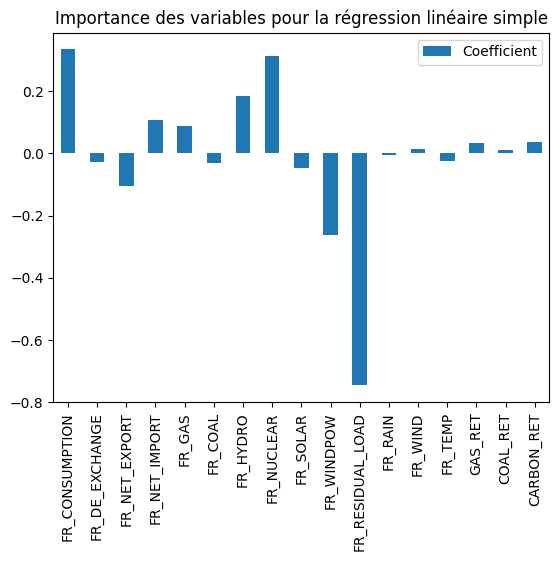

In [130]:
# Affichage des coefficients et de l'importance des variables pour le modèle de reg simple
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

coefficients_lin = pd.DataFrame(reg_lin_simple.coef_, index=data_fr_train.columns, columns=['Coefficient'])
coefficients_lin.plot(kind='bar')
plt.title('Importance des variables pour la régression linéaire simple')
plt.show()
# plt.savefig('reg_lin_simple.png', dpi=500)
plt.close()